# 📊 Comprehensive Guide to Data Visualization with Pandas & Seaborn & Matplotlib

##🔹 What You'll Learn <br>
✅ Choropleth maps <br>
* Attached to this notebook is a US counties shapefile at 1:20m resolution, downloaded from https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html With GeoPandas we read in the .shp file; it looks for the other associated files in the same directory.

* Also attached to this notebook is a CSV of 2024 U.S. Election results by county, downloaded from https://github.com/tonmcg/US_County_Level_Election_Results_08-24

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
us_counties = gpd.read_file("cb_2023_us_county_20m.shp")

In [3]:
us_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,027,00345518,0500000US13027,13027,Brooks,Brooks County,GA,Georgia,06,1277341276,11955761,"POLYGON ((-83.73616 31.03768, -83.57396 31.033..."
1,31,095,00835869,0500000US31095,31095,Jefferson,Jefferson County,NE,Nebraska,06,1476765697,14202851,"POLYGON ((-97.36869 40.35039, -96.91606 40.349..."
2,51,683,01498430,0500000US51683,51683,Manassas,Manassas city,VA,Virginia,25,25493247,146287,"POLYGON ((-77.52666 38.7332, -77.49545 38.7706..."
3,56,021,01605075,0500000US56021,56021,Laramie,Laramie County,WY,Wyoming,06,6956355036,4348083,"POLYGON ((-105.27824 41.65666, -104.65334 41.6..."
4,13,135,01688166,0500000US13135,13135,Gwinnett,Gwinnett County,GA,Georgia,06,1116606767,15938345,"POLYGON ((-84.27117 33.9598, -84.26266 33.9871..."


In [4]:
election_results = pd.read_csv("2024_US_County_Level_Presidential_Results.csv", dtype = {"county_fips": "str"})

In [5]:
us_counties_with_election_results = us_counties.merge(election_results, left_on="GEOID", right_on="county_fips")

In [6]:
us_counties_with_election_results.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,13,027,00345518,0500000US13027,13027,Brooks,Brooks County,GA,Georgia,06,...,Georgia,13027,Brooks County,4560,2629,7210,1931.0,0.632455,0.364632,0.267822
1,31,095,00835869,0500000US31095,31095,Jefferson,Jefferson County,NE,Nebraska,06,...,Nebraska,31095,Jefferson County,2614,968,3631,1646.0,0.719912,0.266593,0.453319
2,51,683,01498430,0500000US51683,51683,Manassas,Manassas city,VA,Virginia,25,...,Virginia,51683,Manassas city,6446,8726,15456,-2280.0,0.417055,0.564570,-0.147516
3,56,021,01605075,0500000US56021,56021,Laramie,Laramie County,WY,Wyoming,06,...,Wyoming,56021,Laramie County,28063,14153,42899,13910.0,0.654164,0.329914,0.324250
4,13,135,01688166,0500000US13135,13135,Gwinnett,Gwinnett County,GA,Georgia,06,...,Georgia,13135,Gwinnett County,173041,242507,420681,-69466.0,0.411335,0.576463,-0.165127


## U.S. Presidential Election Results by County (2024)

### Key Steps
1. **Filter the Lower 48 States**
   - Excludes Alaska and Hawaii to focus on the contiguous U.S.
   - `lower48` contains only counties from the 48 mainland states.

In [7]:
lower48 = us_counties_with_election_results[(us_counties_with_election_results.state_name != "Alaska") & (us_counties_with_election_results.state_name != "Hawaii")]

2. **Plot the Election Results** <br>
- A choropleth map showing county-level election results.
- Red and blue shading indicates candidate advantage, with darker colors representing larger vote margins.

  - column="per_point_diff": Colors represent the percentage point difference between candidates.
  - cmap="RdBu_r": Uses the Red (Republican) ↔ Blue (Democrat) color scheme.
  - legend=True: Adds a color bar for reference.
  - vmin=-0.8, vmax=0.8: Normalizes color intensity within this range.

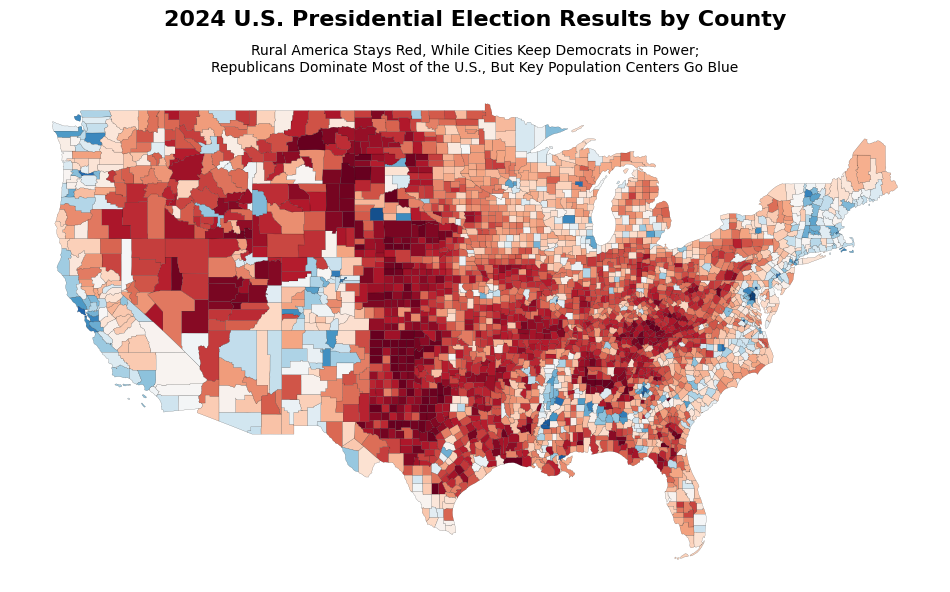

In [37]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the map without the colorbar (legend)
lower48.plot(column="per_point_diff", cmap="RdBu_r", vmin=-0.8, vmax=0.8, linewidth=0.1, edgecolor="black", ax=ax)

# Add title and subtitle
ax.set_title("2024 U.S. Presidential Election Results by County", fontsize=16, fontweight="bold", pad=40)
ax.text(
    0.5, 1.02,
    "Rural America Stays Red, While Cities Keep Democrats in Power;\n"
    "Republicans Dominate Most of the U.S., But Key Population Centers Go Blue",
    transform=ax.transAxes,
    ha="center",
    fontsize=10
)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Remove colorbar
for cbar_ax in fig.axes[1:]:  # Removes any extra colorbars
    fig.delaxes(cbar_ax)

plt.show()
